In [1]:
pip install --upgrade pip


  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.1 MB 656.4 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/2.1 MB 1.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/2.1 MB 1.2 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.1 MB 1.4 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.1 MB 1.7 MB/s eta 0:00:01
   ----------- ---------------------------- 0.6/2.1 MB 1.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/2.1 MB 2.0 MB/s eta 0:00:01
   ---------------- ----------------------- 0.9/2.1 MB 2.2 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 2.3 

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns
import gc
import pandas as pd
import matplotlib.image as img
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
import glob
import cv2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.applications import VGG16
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from sklearn.metrics import confusion_matrix
import numpy as np
from  sklearn.linear_model import LogisticRegression
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
root_data_train = 'dataImages/train'

In [8]:
label_image_train = [name_subfolder for name_subfolder in os.listdir(root_data_train)
                    if os.path.isdir(os.path.join(root_data_train, name_subfolder))]

images_data = []
labels_data = []

new_size = (90, 90)

for label in label_image_train:
    label_root = os.path.join(root_data_train, label)
    image_files = glob.glob(os.path.join(label_root, '*'))
    for image_path in image_files:
        if os.path.isfile(image_path):
            image_path = Image.open(image_path).convert('RGB')
            image_path = image_path.resize(new_size)
            image_path_new_array = np.array(image_path)
            images_data.append(image_path_new_array)
            labels_data.append(label)

In [9]:
len(images_data)

4252

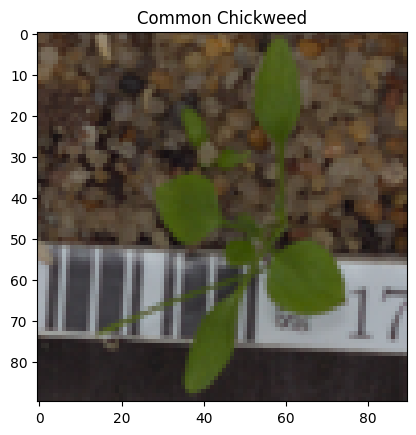

In [10]:
plt.imshow(images_data[1000]) 
plt.title(labels_data[1000])  
plt.show()

In [11]:
labels_transform = labels_data
le_transform = LabelEncoder()
encoded_labels = pd.DataFrame(labels_transform)
encoded_labels = le_transform.fit_transform(encoded_labels[0])
encoded_labels
#value_out_transform = len(le_transform.classes_)
#labels_tranform_encoded = to_categorical(encoded_labels, dtype ="uint8")
#labels_tranform_encoded
#pd.Series(labels_transform).value_counts()  

array([ 0,  0,  0, ..., 10, 10, 10])

In [12]:
images_data = np.array(images_data)
np.save('image_data', images_data)
np.save('labels_data', encoded_labels)

In [13]:
images_data = np.load('image_data.npy', allow_pickle=True)
encoded_labels = np.load('labels_data.npy', allow_pickle=True)

In [14]:
image_data_shape = np.arange(images_data.shape[0])
np.random.shuffle(image_data_shape)
images_data = images_data[image_data_shape]
encoded_labels = encoded_labels[image_data_shape]

In [15]:
num_out_classes = len(np.unique(encoded_labels))
len_data_image = len(images_data)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(images_data, encoded_labels, test_size=0.2)

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
y_train = keras.utils.to_categorical(y_train, num_out_classes)
y_test = keras.utils.to_categorical(y_test, num_out_classes)

In [35]:
modelCNN_DataImage = Sequential()
modelCNN_DataImage.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=(new_size[0],new_size[1],3), activation='relu',
                             kernel_regularizer=l2(0.001)))
modelCNN_DataImage.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu', kernel_regularizer=l2(0.001)))
modelCNN_DataImage.add(MaxPooling2D(pool_size=(2,2)))
modelCNN_DataImage.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu', kernel_regularizer=l2(0.001)))
modelCNN_DataImage.add(Conv2D(filters=128, kernel_size=(2,2), activation='relu', kernel_regularizer=l2(0.001)))
modelCNN_DataImage.add(MaxPooling2D(pool_size=(2,2)))
modelCNN_DataImage.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu', kernel_regularizer=l2(0.001)))
modelCNN_DataImage.add(Conv2D(filters=128, kernel_size=(2,2), activation='relu', kernel_regularizer=l2(0.001)))
#modelCNN_DataImage.add(Conv2D(filters=256, kernel_size=(2,2), activation='relu', kernel_regularizer=l2(0.001)))
modelCNN_DataImage.add(MaxPooling2D(pool_size=(2,2)))
modelCNN_DataImage.add(Dropout(0.05))

modelCNN_DataImage.add(Flatten())
modelCNN_DataImage.add(Dense(64, activation='relu'))
modelCNN_DataImage.add(Dropout(0.1))
modelCNN_DataImage.add(Dense(64, activation='relu'))
modelCNN_DataImage.add(Dropout(0.1))
modelCNN_DataImage.add(Dense(11, activation='softmax'))

modelCNN_DataImage.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 89, 89, 32)        416       
                                                                 
 conv2d_25 (Conv2D)          (None, 88, 88, 64)        8256      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 44, 44, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 43, 43, 64)        16448     
                                                                 
 conv2d_27 (Conv2D)          (None, 42, 42, 128)       32896     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 21, 21, 128)       0         
 ng2D)                                                

In [36]:
opt = Adam(learning_rate=0.001) 
modelCNN_DataImage.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
class callbackPersonalized(tf.keras.callbacks.Callback):
    def epoch_end_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98):
            print('Alcanzó el 94%')
            self.model.stop_training = True

myCallbackData = callbackPersonalized()

In [38]:
imageGenData = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.35,
    zoom_range=0.22,
    horizontal_flip=True,
    fill_mode='nearest')

In [39]:
process_hist = modelCNN_DataImage.fit(imageGenData.flow(X_train, y_train, batch_size=64),
                                epochs=300, batch_size=128, 
                                validation_data=(X_test, y_test),
                                callbacks=[myCallbackData])

Epoch 1/300
54/54 [==============================] - 40s 720ms/step - loss: 2.5664 - accuracy: 0.1367 - val_loss: 2.4487 - val_accuracy: 0.1410
Epoch 2/300
54/54 [==============================] - 40s 740ms/step - loss: 2.4075 - accuracy: 0.1408 - val_loss: 2.3779 - val_accuracy: 0.1410
Epoch 3/300
54/54 [==============================] - 41s 757ms/step - loss: 2.3754 - accuracy: 0.1455 - val_loss: 2.3527 - val_accuracy: 0.1410
Epoch 4/300
54/54 [==============================] - 40s 742ms/step - loss: 2.2374 - accuracy: 0.2108 - val_loss: 2.0648 - val_accuracy: 0.2468
Epoch 5/300
54/54 [==============================] - 39s 725ms/step - loss: 1.9562 - accuracy: 0.2876 - val_loss: 1.7964 - val_accuracy: 0.3208
Epoch 6/300
54/54 [==============================] - 40s 735ms/step - loss: 1.8597 - accuracy: 0.3002 - val_loss: 1.7712 - val_accuracy: 0.3267
Epoch 7/300
54/54 [==============================] - 40s 733ms/step - loss: 1.8200 - accuracy: 0.3305 - val_loss: 1.8718 - val_accuracy:

KeyboardInterrupt: 

In [42]:
evaluate_scores = modelCNN_DataImage.evaluate(X_test, y_test, verbose=1)

27/27 [==============================] - 3s 104ms/step - loss: 0.3453 - accuracy: 0.9166


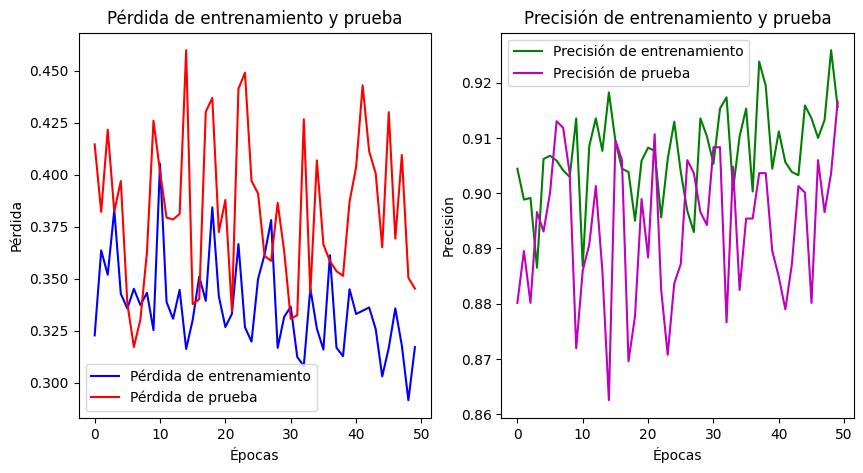

In [43]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(process_hist.history['loss'], label='Pérdida de entrenamiento', color='b') 
plt.plot(process_hist.history['val_loss'], label='Pérdida de prueba', color='r')
plt.legend()
plt.title('Pérdida de entrenamiento y prueba')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

plt.subplot(1, 2, 2)
plt.plot(process_hist.history['accuracy'], label='Precisión de entrenamiento', color='g') 
plt.plot(process_hist.history['val_accuracy'], label='Precisión de prueba', color='m')  
plt.legend()
plt.title('Precisión de entrenamiento y prueba')
plt.xlabel('Épocas')
plt.ylabel('Precisión')

plt.show()

In [44]:
gc.collect()

11272

In [45]:
root_data_test = 'dataImages\\test'

In [46]:
image_data = []
file_image = []
for file_data in glob.glob(root_data_test+"/*"):
    if os.path.isfile(file_data):
        image_convert = Image.open(file_data).convert('RGB')
        imgage_resize_data = image_convert.resize(new_size)
        image_data.append(np.array(imgage_resize_data).flatten())
        file_image.append(file_data.split("\\")[2])

In [47]:
image_data_reshape = np.reshape(np.array(image_data), (-1, new_size[0], new_size[1], 3))
image_data_reshape = image_data_reshape / 255
data_transform = le_transform.inverse_transform(np.argmax(modelCNN_DataImage.predict(image_data_reshape), axis=1))
dataframe_data_image = pd.DataFrame(data=zip(file_image, data_transform), columns=["file", "species"])
dataframe_data_image.to_csv("results/prediction1.28_SCF.csv", index=False)

33/33 [==============================] - 4s 99ms/step
